# 機械学習の基本コンセプト① 予測
ここで言う予測とは「正しいデータから正解を求めるモデルを構築し、新たな入力データから正解を予測する」ことであり、機械学習では「教師あり学習」と呼ばれ以下の2つに分類できる

- 分類 ... 入力データのクラスを予測する
- 回帰 ... 入力データから何らかの数値を予測する

## 分類
データから正解のラベルを予測する手法。

以下では今まで使ってきたあやめデータを用いて、データから「あやめの種類」を予測する問題を解く中で、分類の基本的な流れを確認する。

### 分類の準備
機械学習はその適用のための前準備として以下のような準備が必要となる。

- データの用意 ... 何らかのデータソースから扱えるように読み込みを行う
- 正解データと入力データの準備 ... 入力データに対して正解ラベルが紐づくように準備
- 特徴量作成 ... 予測モデルのインプットとなるデータを加工する作業
  - 単純に予測に利用する列（特徴）を選択することから、何らかの加工を行って扱いやすい数値に変換したりするものまで様々な作業が含まれる
- トレーニングデータとテストデータの準備 ... 作成した予測モデルがうまく動作するかテストデータを用いて確認するため
  - テストするデータを用いてモデルを作成してしまうと、新たなデータに対してどの程度良い精度が出るのか検証できない

In [60]:
# 必要なライブラリの読み込み
import pandas as pd
import numpy as np

# 可視化
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [36]:
# データの用意（あやめデータ）
from sklearn.datasets import load_iris
iris = load_iris()

In [37]:
# 正解データと入力データの準備
# インプットデータは X で表わされることが多い
#   raw は生データ（そのままのデータであることを示す用語）の意味
X_raw = iris.data

# 正解データは y で表されることが多い
y = iris.target

In [38]:
# 特徴量作成
X = X_raw[:, [2,3]] # 3, 4列目を抽出

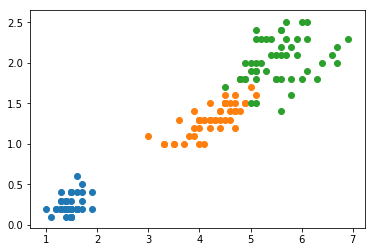

In [39]:
# 図示して確認
for index, y_class in enumerate(np.unique(y)):
    plt.scatter(X[y==y_class,0], X[y==y_class,1])
plt.show()

In [40]:
# トレーニングデータとテストデータの準備 
# scikit-learnのテストデータ作成用の関数を用いる
from sklearn.model_selection import train_test_split

# 既存のデータをトレーニングデータとテストデータに分割
#   元のデータの30%をテストデータとして利用し、分割する際のランダマイズの初期値を0に設定
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [41]:
# それぞれどんなデータになったかを確認
print("X: ", X.shape)
print("X_train: %s / X_test: %s / y_train: %s / y_test: %s" % (X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X:  (150, 2)
X_train: (105, 2) / X_test: (45, 2) / y_train: (105,) / y_test: (45,)


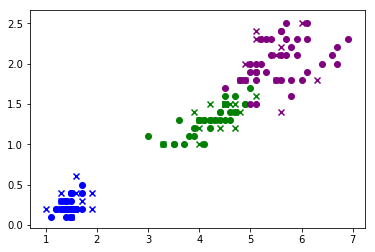

In [47]:
# 図示して確認
color_map = ["blue", "green", "purple"]
for index, y_class in enumerate(np.unique(y)):
    plt.scatter(X_train[y_train==y_class,0], X_train[y_train==y_class,1], c=color_map[y_class])
    plt.scatter(X_test[y_test==y_class,0], X_test[y_test==y_class,1], marker='x', c=color_map[y_class])
plt.show()

### 予測モデルの構築
- 予測モデルを構築する機械学習手法は多く、データやどのような予測を行うか応じて手法を選べると良い
- とはいえ、初めから全ての手法を把握することは難しいので都度手法を試したり、手法の中身を理解したりすることで最適な手法を選択できるようになると良い
- 今回は分類の代表的な手法であるSVM（Support Vector Machine）を用いる
- SVMの中身を知りたい場合は以下の書籍がおすすめ
  - 概要を知りたい場合: 『[Python機械学習プログラミング 達人データサイエンティストによる理論と実践](https://www.amazon.co.jp/dp/B01HGIPIAK)』の3章
  - 詳細を理解したい場合: 『[パターン認識と機械学習 下](https://www.amazon.co.jp/dp/4621061240/)』の7章

In [51]:
# svmクラスの読み込み
from sklearn import svm

# 予測モデル(分類器=classifier)の初期化
classifier = svm.SVC()

# Xを入力した時にyを出力するように学習
classifier.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [52]:
# 作成した予測モデルでテストデータの予測
y_prediction = classifier.predict(X_test)
y_prediction

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

### 評価
- 予測モデルの評価には様々な方法があるが、基本的には何らかの価値基準に沿ってよりよくなるほど数値が上がる（もしくは下がる）ような指標が用いられる
- 機械学習手法と同じで学習を進める中で評価指標について学んでいき、目的に沿った評価指標を用いれるようになると良い
- 今回は「正解率（正答率とも呼ばれる)」を用いて予測モデルの評価を行う

$$
正解率 = \frac{テストデータのうち正しく分類できた個数}{全てのテストデータの個数}
$$

In [55]:
# 評価用の関数読み込み
from sklearn.metrics import accuracy_score
print("正解率: ", accuracy_score(y_test, y_pred))

正解率:  0.9777777777777777


## 回帰
データから数値を予測する手法。

以下では「ボストン住宅価格データセット」と言うデータを用いて「住宅価格の中央値」を予測する問題を解いてみる中で、回帰の基本的な流れを確認する。

大まかな流れは「分類」の時に確認した、以下の流れと同様である。

1. 分類の準備
2. 予測モデルの構築
3. 評価

## ボストン住宅価格データセット
回帰の練習として利用することができる、ボストン住宅価格データセット

- CRIM ... 犯罪発生率（人口単位）
- ZN ... 25,000平方フィート以上の住宅区画の割合
- INDUS ... 非小売業の土地面積の割合（人口単位）
- CHAS ... チャールズ川沿いかどうか（チャールズ川沿いの場合は1、それ以外の場合は0）
- NOX ... 窒素酸化物の濃度
- RM ... 1戸あたりの平均部屋数
- AGE ... 1940年以前に建設された家屋の割合
- DIS ... 5つのボストンの主な雇用兼までの重み付き距離
- RAD ... 幹線道路へのアクセス指標
- TAX ... 10,000ドルあたりの所得税率
- PTRATIO ... 教師1人あたりの生徒の数
- B ... 町におけるアフリカ系アメリカ人の割合
- LSTAT ... 低所得者の割合
- MEDV ... 住宅価格の中央値

In [66]:
from sklearn.datasets import load_boston
#X, y = load_boston(return_X_y=True)
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['MEDV'] = boston.target

In [70]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [67]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 1. 分類の準備 特徴量作成
予測に利用する列（特徴量）を考えるために可視化する（「探索的データ分析」などと言ったりする）

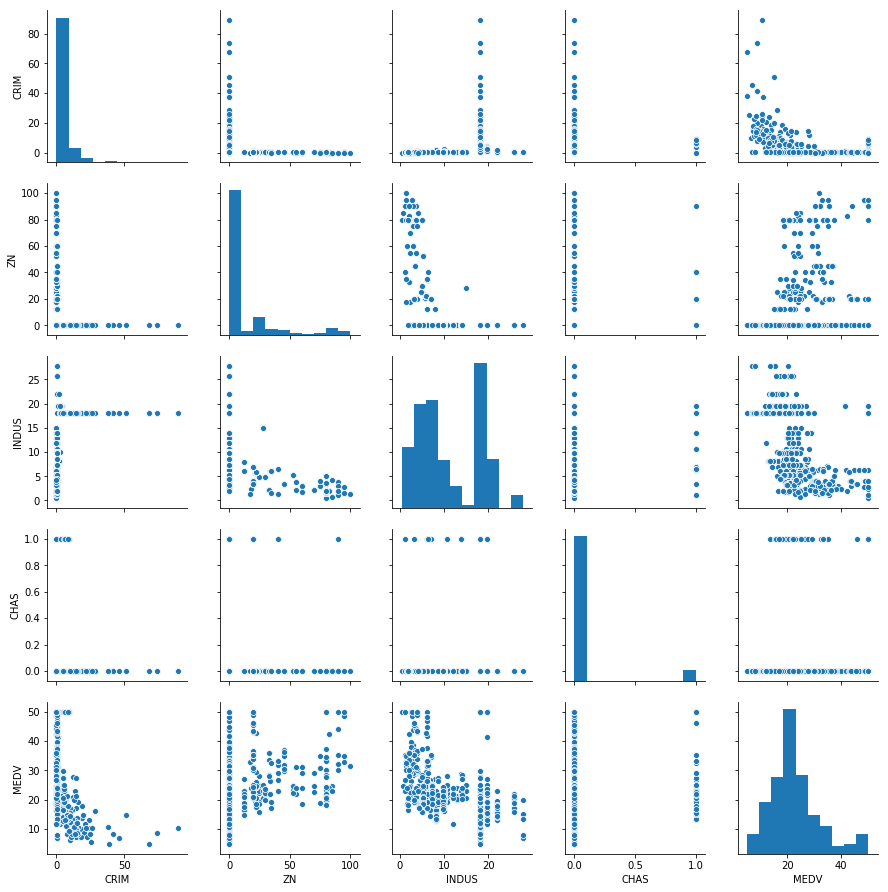

In [100]:
# ペアプロットと言う可視化手法で可視化
#   各特徴量の組み合わせで散布図を描画する
choiced_cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'MEDV']
sns.pairplot(boston_df[choiced_cols])

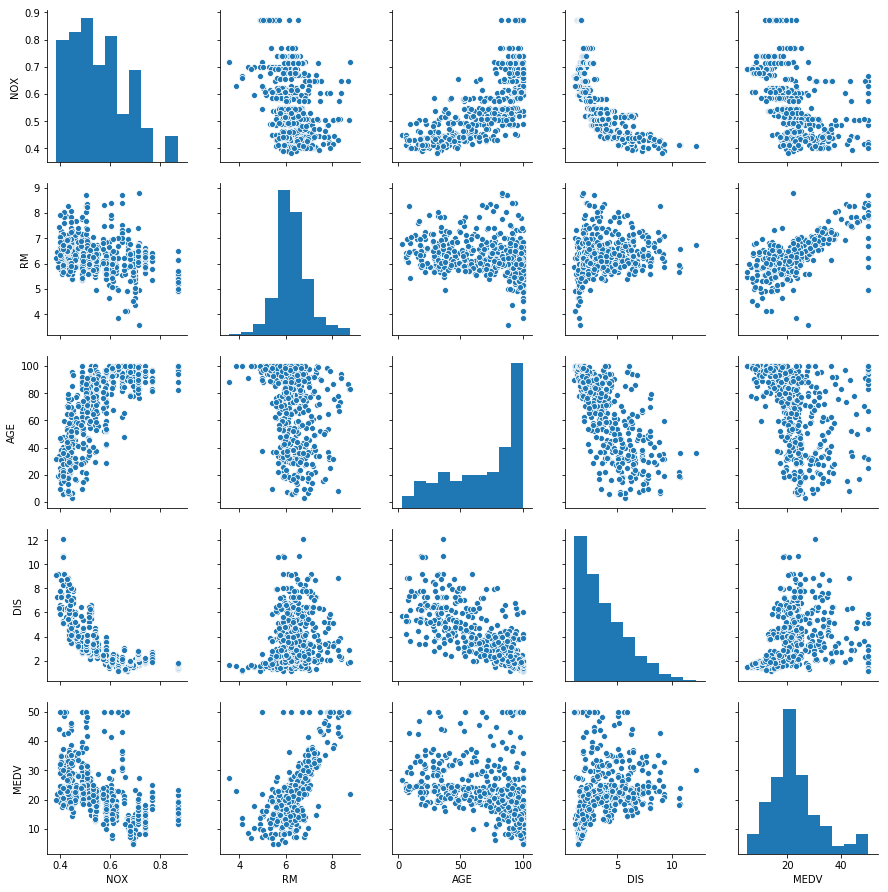

In [101]:
# 他の特徴量についても可視化
choiced_cols = ['NOX', 'RM', 'AGE', 'DIS', 'MEDV']
sns.pairplot(boston_df[choiced_cols])

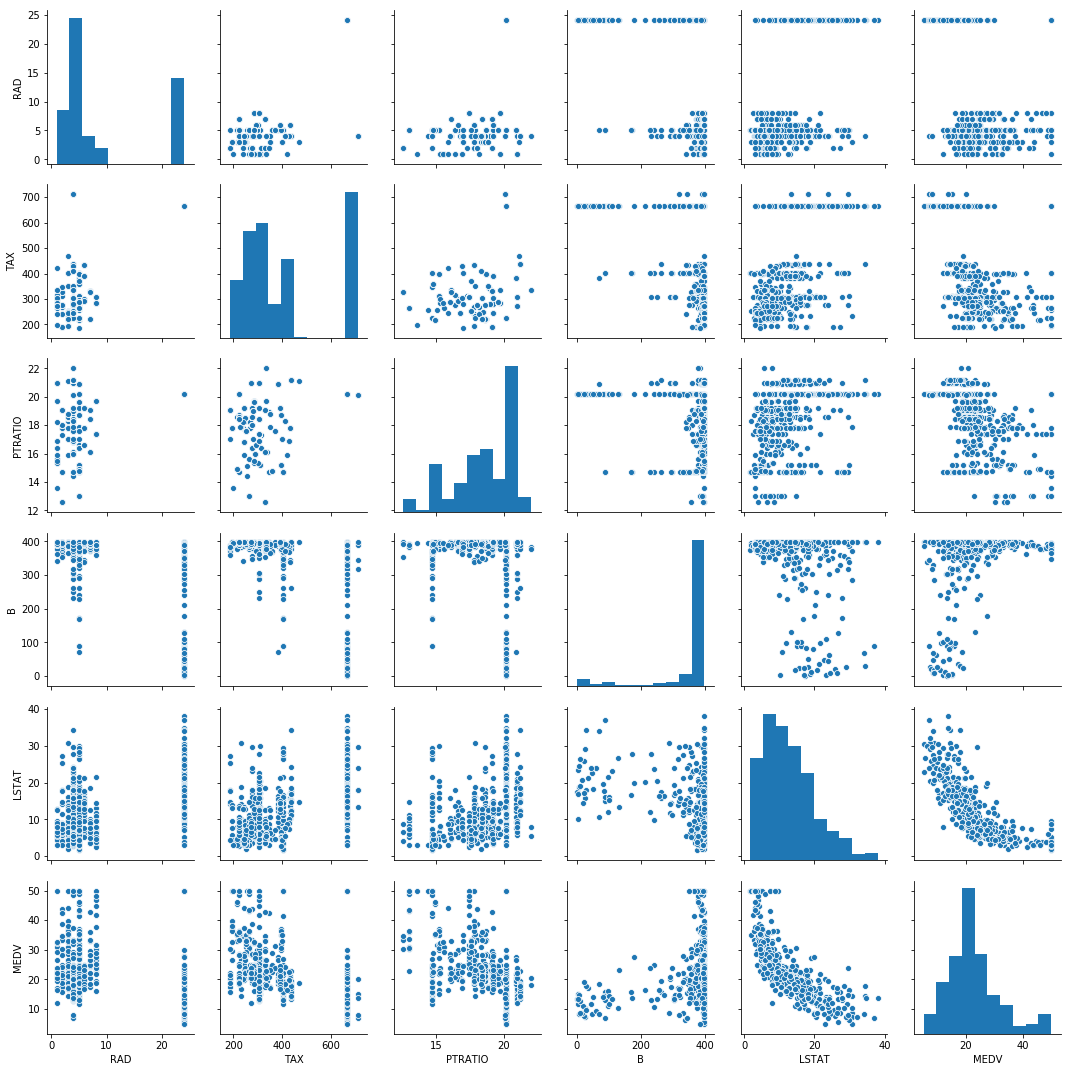

In [102]:
# 他の特徴量についても可視化
choiced_cols = ['RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
sns.pairplot(boston_df[choiced_cols])

In [86]:
# 上記の結果からMEDV（住宅価格の中央値）と関連して数値が変動している特徴量として以下を選択
#   その他の特徴量についても考慮してみるのも良いかもしれない
picked_features = [ 'RM', 'LSTAT']

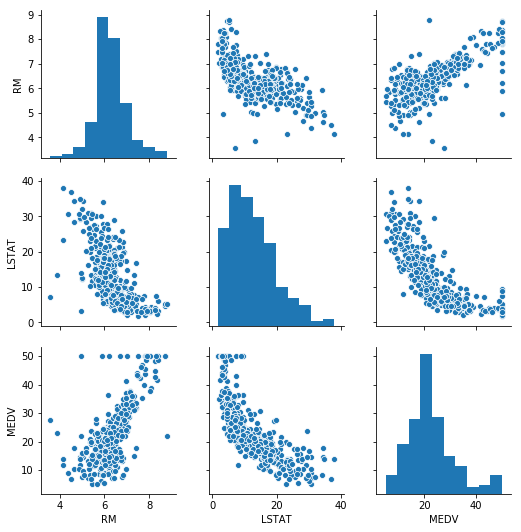

In [87]:
# 図示して確認
sns.pairplot(boston_df[picked_features + ['MEDV']])

In [84]:
# 正解データと入力データの準備
X = boston_df[picked_features].values # 実は ".values" は利用しなくてもそのままインプットに使える
y = boston_df['MEDV'].values

In [93]:
# トレーニングデータとテストデータの準備 
# scikit-learnのテストデータ作成用の関数を用いる
from sklearn.model_selection import train_test_split

# 既存のデータをトレーニングデータとテストデータに分割
#   元のデータの30%をテストデータとして利用し、分割する際のランダマイズの初期値を0に設定
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 2. 予測モデルの構築
- 分類の時と同様、回帰でも予測モデルを構築する機械学習手法は多いのでデータやどのような予測を行うか応じて手法を選べると良い
- 今回は回帰の代表的な手法であり、よく使われているを用いる
- SVMの中身を知りたい場合は以下の書籍がおすすめ
  - 概要を知りたい場合: 『Python機械学習プログラミング 達人データサイエンティストによる理論と実践』の10章
  - 詳細を知りたい場合: 『[1.5. Stochastic Gradient Descent](https://scikit-learn.org/stable/modules/sgd.html#regression)』

In [94]:
# linear_modelクラスの読み込み
from sklearn import linear_model

# 予測モデルの初期化
classifier = linear_model.SGDRegressor(max_iter=1000, tol=1e-3)

# Xを入力した時にyを出力するように学習
classifier.fit(X, y)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=1000, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=0.001, verbose=0,
       warm_start=False)

In [95]:
# 作成した予測モデルでテストデータの予測
y_prediction = classifier.predict(X_test)
y_prediction[0:10] # 10件分を表示

array([25.90570375, 31.44097279, 29.65546001, 16.70954684, 26.54638402,
       23.73273569, 27.48981793, 22.5670617 , 14.62888152, 26.89407361])

### 評価
- 分類の時と同様に、回帰の評価指標についても学習を進める中で目的に沿った評価指標を用いれるようになると良い
- 今回は「平均二乗誤差（Mean Squared Error: MSE）」を用いて予測モデルの評価を行う
  - 間違えが多いほど大きくなり、正解が多いほど小さくなる指標

$$
MSE = \frac{1}{n}\sum_{i=1}^{n}(y_{pred}^i - y_{test}^i)^2
$$

- $y_{pred}^i$ ... 予測した数値データ
- $y_{test}^i$ ... 正解の数値データ

In [97]:
# 評価用の関数読み込み
from sklearn.metrics import mean_squared_error
print("平均二乗誤差（トレーニングデータ）: ", mean_squared_error(y_train, y_train))
print("平均二乗誤差（テストデータ）: ", mean_squared_error(y_test, y_prediction))

平均二乗誤差（トレーニングデータ）:  0.0
平均二乗誤差（テストデータ）:  51.52621326892719


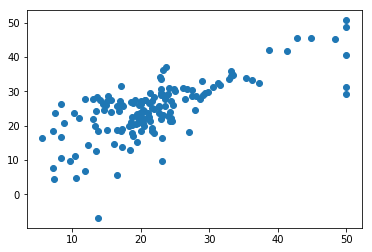

In [98]:
# 予測データと正解データのセットをプロットしてみる
plt.scatter(y_test, y_prediction)

## 補足
以上で予測に関する流れの確認は以上だが、この後に予測の精度が上がる（評価指標を改善）ように色々と工夫をしていく作業があり、これをチューニングなどと言う。
今回は特徴量をそのまま使ったが、特徴量エンジニアリングと呼ばれる領域があり、予測精度を上げるための特徴量を作成したりすることは、機械学習で予測を行う際に重要な作業である。